In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/data/'
npz_name = 'Incucyte64.npz'
npz_val_name = 'Incucyte64Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd92.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 92
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 64
imagey = 64

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=92, epochs=250, gridx=1, gridy=1, imagex=64, imagey=64, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd92.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/data/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 1121
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
number of  images:	 59
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
loading weights
(1121, 1, 1, 4) 1








/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)










Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1121 samples, validate on 59 samples
Epoch 1/250
1121/1121 [==============================] - 15s 13ms/step - loss: 1.0706 - acc: 0.9723 - val_loss: 1.1953 - val_acc: 0.9322

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1953445672988892, 'val_acc': 0.9322034120559692, 'loss': 1.0705601314047848, 'acc': 0.972346129160072, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

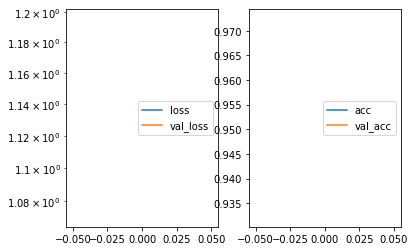

Predicted cell: Cells Probability: [[0.9922983]]
True Cell type: Cells
x [[0.30836636]]
True positional value x 0.34375
y [[0.71003044]]
True positional value y 0.65625


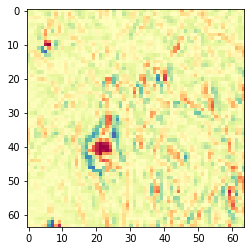

Epoch 2/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0697 - acc: 0.9759 - val_loss: 1.1802 - val_acc: 0.9322

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.180182933807373, 'val_acc': 0.9322034120559692, 'loss': 1.0697126877722625, 'acc': 0.9759143737147261, 'lr': 1e-06}


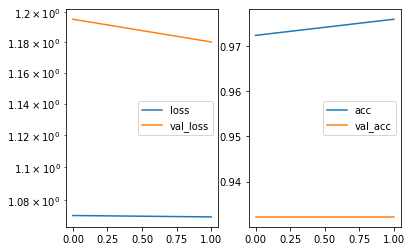

Predicted cell: Cells Probability: [[0.953918]]
True Cell type: Cells
x [[0.5951698]]
True positional value x 0.65625
y [[0.34405532]]
True positional value y 0.34375


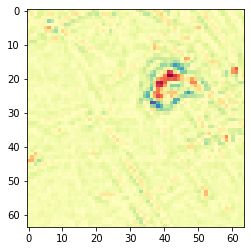

Epoch 3/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0619 - acc: 0.9759 - val_loss: 1.1744 - val_acc: 0.9322

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1743907928466797, 'val_acc': 0.9322034120559692, 'loss': 1.061852148555412, 'acc': 0.9759143745122905, 'lr': 1e-06}


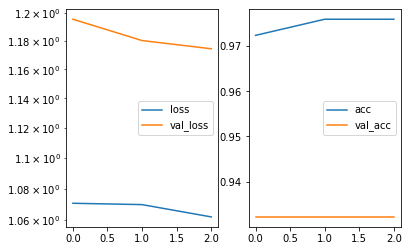

Predicted cell: Cells Probability: [[0.9579884]]
True Cell type: Cells
x [[0.30144814]]
True positional value x 0.34375
y [[0.67651445]]
True positional value y 0.65625


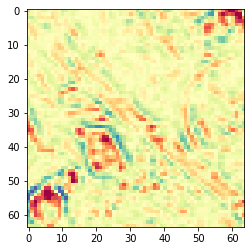

Epoch 4/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0597 - acc: 0.9813 - val_loss: 1.1569 - val_acc: 0.9322

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1569061279296875, 'val_acc': 0.9322034120559692, 'loss': 1.0596996131058147, 'acc': 0.9812667325710633, 'lr': 1e-06}


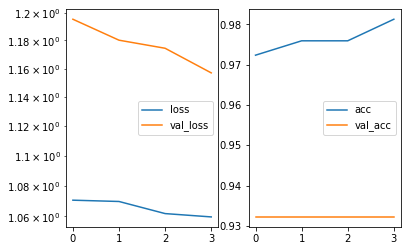

Predicted cell: Normal Probability: [[0.92314106]]
True Cell type: Normal
x [[0.38901177]]
True positional value x 0.5
y [[0.5617172]]
True positional value y 0.5


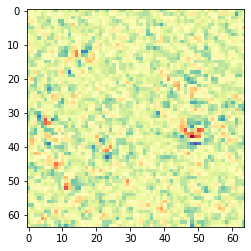

Epoch 5/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0522 - acc: 0.9768 - val_loss: 1.1481 - val_acc: 0.9492

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1480661630630493, 'val_acc': 0.9491525292396545, 'loss': 1.052180526194883, 'acc': 0.97680643432168, 'lr': 1e-06}


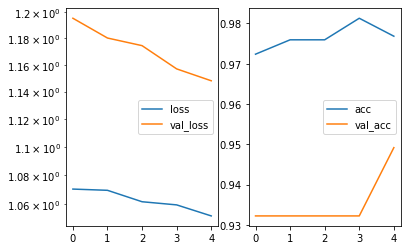

Predicted cell: Normal Probability: [[0.89997476]]
True Cell type: Normal
x [[0.46585405]]
True positional value x 0.5
y [[0.52843314]]
True positional value y 0.5


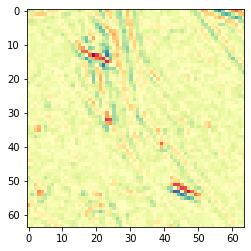

Epoch 6/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0503 - acc: 0.9768 - val_loss: 1.1384 - val_acc: 0.9492

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1383795738220215, 'val_acc': 0.9491525292396545, 'loss': 1.0503009023887573, 'acc': 0.9768064449558718, 'lr': 1e-06}


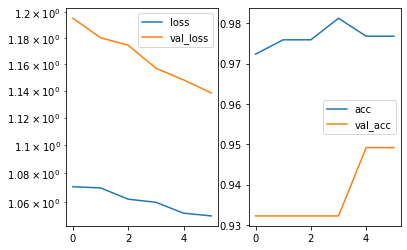

Predicted cell: Cells Probability: [[0.98648524]]
True Cell type: Cells
x [[0.49590376]]
True positional value x 0.34375
y [[0.66530555]]
True positional value y 0.34375


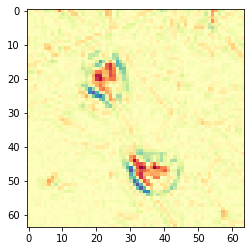

Epoch 7/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0473 - acc: 0.9804 - val_loss: 1.1310 - val_acc: 0.9492

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1309585571289062, 'val_acc': 0.9491525292396545, 'loss': 1.0473326107521976, 'acc': 0.9803746682421423, 'lr': 1e-06}


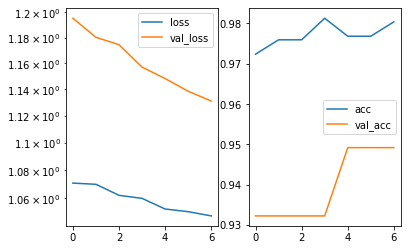

Predicted cell: Normal Probability: [[0.9340913]]
True Cell type: Normal
x [[0.57377064]]
True positional value x 0.5
y [[0.48335996]]
True positional value y 0.5


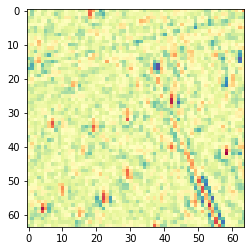

Epoch 8/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0386 - acc: 0.9795 - val_loss: 1.1564 - val_acc: 0.9322

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1564226150512695, 'val_acc': 0.9322034120559692, 'loss': 1.0385931147516678, 'acc': 0.9794826084327528, 'lr': 1e-06}


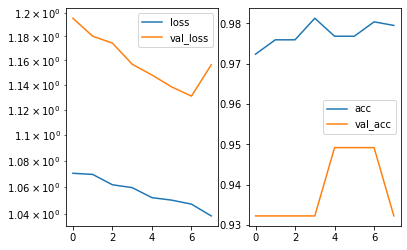

Predicted cell: Cells Probability: [[0.99581546]]
True Cell type: Cells
x [[0.41517478]]
True positional value x 0.5
y [[0.78563637]]
True positional value y 0.34375


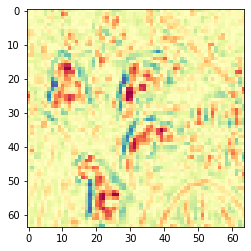

Epoch 9/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0376 - acc: 0.9813 - val_loss: 1.1574 - val_acc: 0.9492

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1574474573135376, 'val_acc': 0.9491525292396545, 'loss': 1.037606944365761, 'acc': 0.9812667280515318, 'lr': 1e-06}


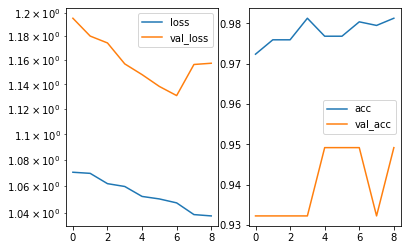

Predicted cell: Cells Probability: [[0.6444568]]
True Cell type: Cells
x [[0.42137927]]
True positional value x 0.5
y [[0.6059243]]
True positional value y 0.65625


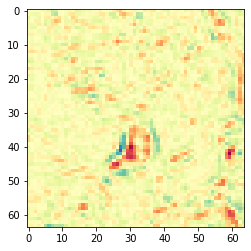

Epoch 10/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0325 - acc: 0.9804 - val_loss: 1.1537 - val_acc: 0.9492

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1537182331085205, 'val_acc': 0.9491525292396545, 'loss': 1.032492638165987, 'acc': 0.9803746727616738, 'lr': 1e-06}


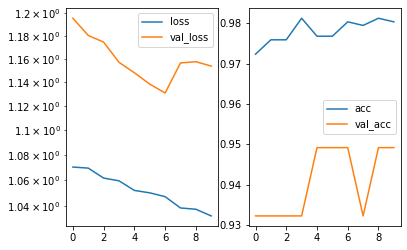

Predicted cell: Cells Probability: [[0.9391643]]
True Cell type: Cells
x [[0.6374892]]
True positional value x 0.65625
y [[0.55320734]]
True positional value y 0.65625


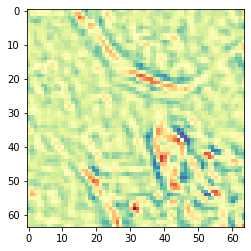

Epoch 11/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0408 - acc: 0.9831 - val_loss: 1.1708 - val_acc: 0.9492

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1708183288574219, 'val_acc': 0.9491525292396545, 'loss': 1.0407609954463064, 'acc': 0.9830508636215985, 'lr': 1e-06}


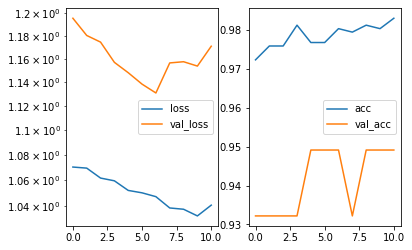

Predicted cell: Cells Probability: [[0.98904395]]
True Cell type: Cells
x [[0.31218863]]
True positional value x 0.34375
y [[0.68887275]]
True positional value y 0.65625


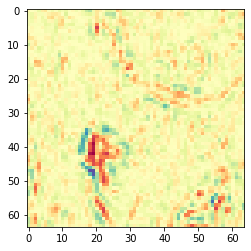

Epoch 12/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0186 - acc: 0.9813 - val_loss: 1.1892 - val_acc: 0.9492

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1891506910324097, 'val_acc': 0.9491525292396545, 'loss': 1.0185574535064459, 'acc': 0.9812667386857236, 'lr': 1e-06}


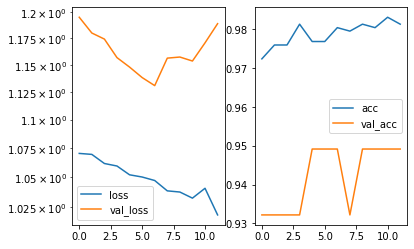

Predicted cell: Cells Probability: [[0.9948048]]
True Cell type: Cells
x [[0.63353586]]
True positional value x 0.5
y [[0.44616136]]
True positional value y 0.5


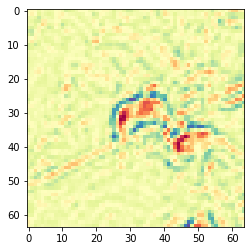

Epoch 13/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0238 - acc: 0.9804 - val_loss: 1.1757 - val_acc: 0.9492

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1757175922393799, 'val_acc': 0.9491525292396545, 'loss': 1.0238208770751953, 'acc': 0.9803746780787697, 'lr': 1e-06}


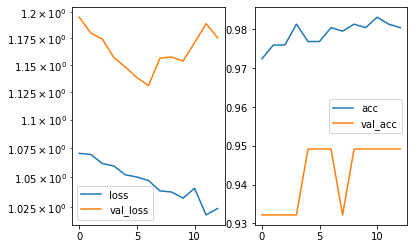

Predicted cell: Cells Probability: [[0.9841986]]
True Cell type: Cells
x [[0.6345198]]
True positional value x 0.65625
y [[0.4715507]]
True positional value y 0.5


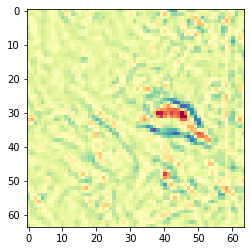

Epoch 14/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0165 - acc: 0.9750 - val_loss: 1.1718 - val_acc: 0.9492

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1717555522918701, 'val_acc': 0.9491525292396545, 'loss': 1.016521262867338, 'acc': 0.975022309385805, 'lr': 1e-06}


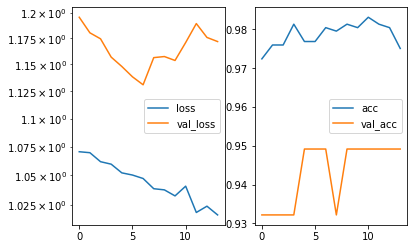

Predicted cell: Cells Probability: [[0.97979087]]
True Cell type: Cells
x [[0.22042453]]
True positional value x 0.34375
y [[0.5414072]]
True positional value y 0.5


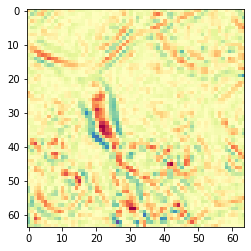

Epoch 15/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0213 - acc: 0.9795 - val_loss: 1.1715 - val_acc: 0.9492

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1714789867401123, 'val_acc': 0.9491525292396545, 'loss': 1.0212564819312118, 'acc': 0.9794826174718158, 'lr': 1e-06}


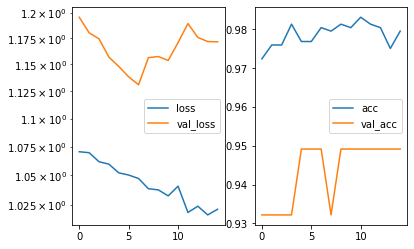

Predicted cell: Cells Probability: [[0.9976319]]
True Cell type: Cells
x [[0.25080463]]
True positional value x 0.34375
y [[0.7834774]]
True positional value y 0.65625


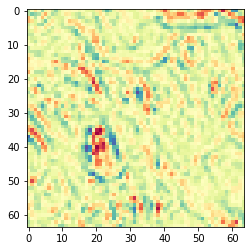

Epoch 16/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0136 - acc: 0.9831 - val_loss: 1.1682 - val_acc: 0.9492

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1681698560714722, 'val_acc': 0.9491525292396545, 'loss': 1.013643431940002, 'acc': 0.9830508529874068, 'lr': 1e-06}


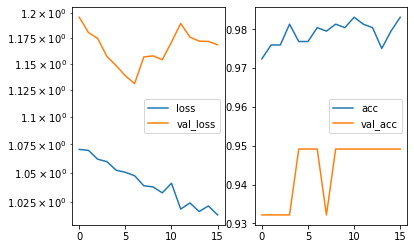

Predicted cell: Cells Probability: [[0.95417106]]
True Cell type: Cells
x [[0.3925194]]
True positional value x 0.5
y [[0.42659903]]
True positional value y 0.34375


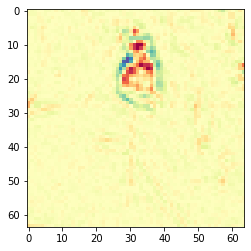

Epoch 17/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0159 - acc: 0.9804 - val_loss: 1.1810 - val_acc: 0.9492

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1809906959533691, 'val_acc': 0.9491525292396545, 'loss': 1.0158681810487071, 'acc': 0.9803746788763341, 'lr': 1e-06}


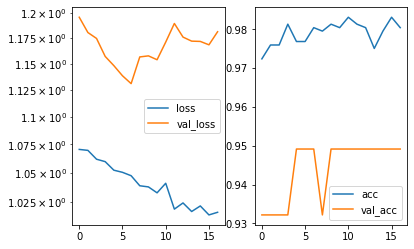

Predicted cell: Cells Probability: [[0.939939]]
True Cell type: Cells
x [[0.39821318]]
True positional value x 0.34375
y [[0.64262253]]
True positional value y 0.65625


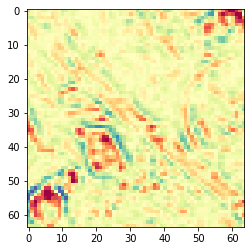

Epoch 18/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0267 - acc: 0.9795 - val_loss: 1.1830 - val_acc: 0.9492

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.18304443359375, 'val_acc': 0.9491525292396545, 'loss': 1.0266982243594902, 'acc': 0.9794826190669446, 'lr': 1e-06}


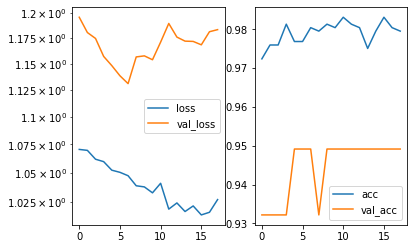

Predicted cell: Cells Probability: [[0.9963452]]
True Cell type: Cells
x [[0.13542412]]
True positional value x 0.5
y [[0.82153]]
True positional value y 0.65625


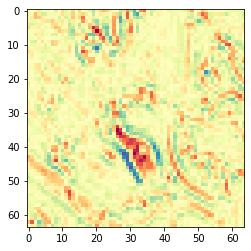

Epoch 19/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0140 - acc: 0.9822 - val_loss: 1.1887 - val_acc: 0.9492

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1887476444244385, 'val_acc': 0.9491525292396545, 'loss': 1.0139604481493756, 'acc': 0.9821588030146446, 'lr': 1e-06}


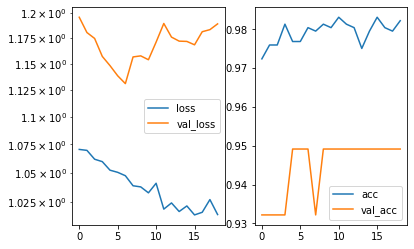

Predicted cell: Cells Probability: [[0.6586043]]
True Cell type: Normal
x [[0.65328604]]
True positional value x 0.5
y [[0.46914157]]
True positional value y 0.5


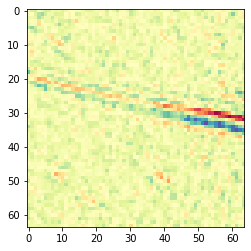

Epoch 20/250
1121/1121 [==============================] - 6s 5ms/step - loss: 1.0234 - acc: 0.9822 - val_loss: 1.1799 - val_acc: 0.9492

Epoch 00020: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd92.h5
{'val_loss': 1.1798871755599976, 'val_acc': 0.9491525292396545, 'loss': 1.023399936844471, 'acc': 0.9821587984951131, 'lr': 1e-06}


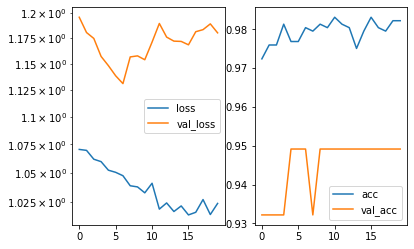

Predicted cell: Cells Probability: [[0.98093075]]
True Cell type: Cells
x [[0.5044231]]
True positional value x 0.5
y [[0.6642692]]
True positional value y 0.65625


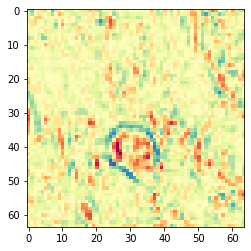

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
